In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("US_Accidents_Data.csv")

In [3]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201,3,2/8/16 5:46,2/8/16 11:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201,2,2/8/16 6:07,2/8/16 6:37,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201,2,2/8/16 6:49,2/8/16 7:19,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201,3,2/8/16 7:23,2/8/16 7:53,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201,2,2/8/16 7:39,2/8/16 8:09,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
data.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
data['State'].value_counts()

CA    262792
TX    134798
FL     87834
NY     51447
PA     46897
SC     40692
MI     39175
NC     36314
GA     33844
IL     30097
VA     26916
OH     21950
WA     21740
NJ     16533
TN     16426
MD     16421
OK     15429
AZ     15140
MA     14758
MN     14676
LA     13431
NE     12932
AL     12452
CO      8029
CT      7485
IN      7196
MO      6735
UT      6029
KY      4796
OR      4509
IA      4075
RI      3578
WI      3405
NV      1982
MS      1609
NH      1420
NM      1314
KS      1123
DC      1121
DE       930
AR       149
WV       120
VT       102
WY        96
ID        40
ME        24
MT         7
ND         5
SD         2
Name: State, dtype: int64

In [6]:
all_states = data.drop(columns=["ID","Source","TMC","Start_Time","End_Time", "Start_Lat","Start_Lng","End_Lat","End_Lng","Distance(mi)","Description","Number","Street","Side","City","County","Zipcode","Country","Timezone","Airport_Code","Weather_Timestamp","Temperature(F)","Wind_Chill(F)","Humidity(%)","Pressure(in)","Wind_Direction","Wind_Speed(mph)","Precipitation(in)","Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"])

all_states.head()

,Severity,State,Visibility(mi),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,3,OH,10.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,OH,10.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,OH,10.0,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False
3,3,OH,9.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2,OH,6.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False


In [7]:
ga_only = all_states[all_states['State']=='GA']

ga_only.head()

,Severity,State,Visibility(mi),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
146261,3,GA,3.0,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
146262,3,GA,3.0,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
146263,3,GA,2.5,Heavy Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
146264,2,GA,9.0,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False
146265,3,GA,10.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
ga_only.describe()

,Severity,Visibility(mi)
count,33844.000000,33153.000000
mean,2.598836,8.985546
std,0.495299,2.355550
min,0.000000,0.100000
25%,2.000000,10.000000
50%,3.000000,10.000000
75%,3.000000,10.000000
max,4.000000,12.000000


In [10]:
ga_severity = ga_only.sort_values("Severity")
ga_severity.head()

,Severity,State,Visibility(mi),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
587453,0,GA,10.0,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False
704964,0,GA,8.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False
799844,1,GA,10.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False
154348,1,GA,10.0,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False
715686,1,GA,10.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#ga_only.to_csv('../ GA_only_data.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33844 entries, 146261 to 1048572
Data columns (total 17 columns):
Severity             33844 non-null int64
State                33844 non-null object
Visibility(mi)       33153 non-null float64
Weather_Condition    33210 non-null object
Amenity              33844 non-null bool
Bump                 33844 non-null bool
Crossing             33844 non-null bool
Give_Way             33844 non-null bool
Junction             33844 non-null bool
No_Exit              33844 non-null bool
Railway              33844 non-null bool
Roundabout           33844 non-null bool
Station              33844 non-null bool
Stop                 33844 non-null bool
Traffic_Calming      33844 non-null bool
Traffic_Signal       33844 non-null bool
Turning_Loop         33844 non-null bool
dtypes: bool(13), float64(1), int64(1), object(2)
memory usage: 1.7+ MB


In [25]:
#Top Weather Conditions for GA
clear = ga_only[(ga_only['Weather_Condition']=='Clear')]
overcast = ga_only[(ga_only['Weather_Condition']=='Overcast')]
mostly_cloud = ga_only[(ga_only['Weather_Condition']=='Mostly Cloudy')]
scatter_cloud = ga_only[(ga_only['Weather_Condition']=='Scattered Clouds')]
part_cloud= ga_only[(ga_only['Weather_Condition']=='Partly Cloudy')]
rain = ga_only[(ga_only['Weather_Condition']=='Light Rain')]

clear_avg = np.average(clear['Severity'])
overcast_avg = np.average(overcast['Severity'])
most_cloud_avg = np.average(mostly_cloud['Severity'])
scatter_cloud_avg = np.average(scatter_cloud['Severity'])
part_cloud_avg = np.average(part_cloud['Severity'])
rain_avg = np.average(rain['Severity'])

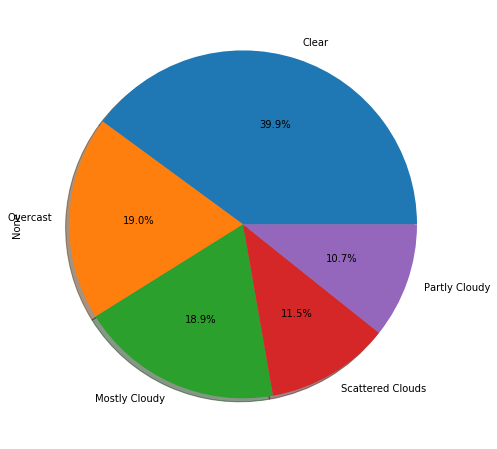

In [35]:
plt.figure(figsize=(14,8))
ga_only.groupby('Weather_Condition') \
        .size() \
        .sort_values(ascending = False) \
        .iloc[:5] \
        .plot.pie(explode=[0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.ioff()

In [13]:
#Top Weather Conditions for All States
clear = all_states[(all_states['Weather_Condition']=='Clear')]
overcast = all_states[(all_states['Weather_Condition']=='Overcast')]
mostly_cloud = all_states[(all_states['Weather_Condition']=='Mostly Cloudy')]
scatter_cloud = all_states[(all_states['Weather_Condition']=='Scattered Clouds')]
part_cloud= all_states[(all_states['Weather_Condition']=='Partly Cloudy')]
rain = all_states[(all_states['Weather_Condition']=='Light Rain')]

all_clear_avg = np.average(clear['Severity'])
all_overcast_avg = np.average(overcast['Severity'])
all_most_cloud_avg = np.average(mostly_cloud['Severity'])
all_scatter cloud_avg = np.average(scatter_cloud['Severity'])
all_part_cloud_avg = np.average(part_cloud['Severity'])
all_rain_avg = np.average(rain['Severity'])

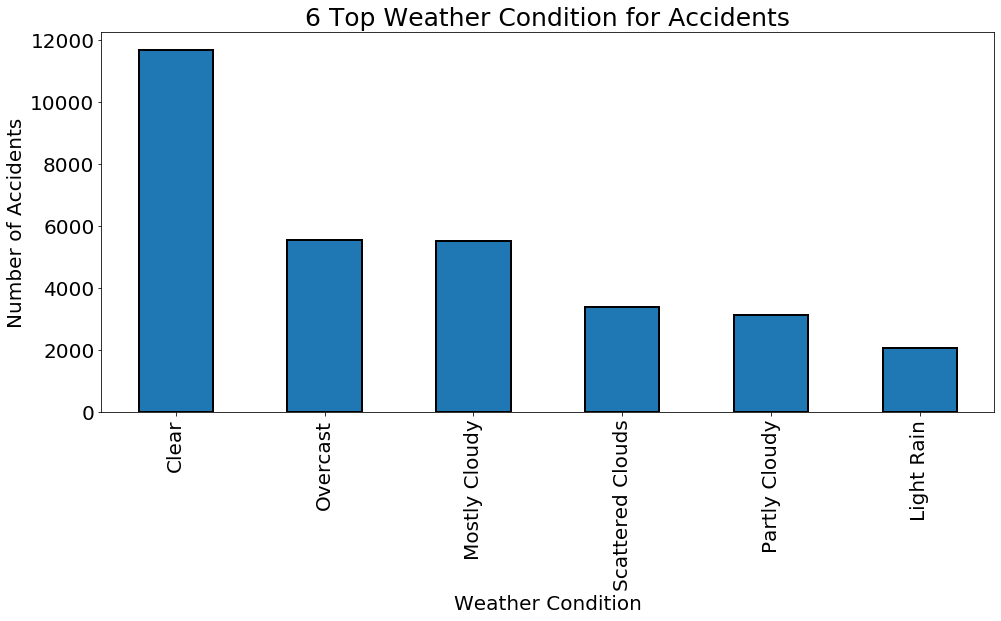

In [39]:
fig, ax=plt.subplots(figsize=(16,7))
ga_only['Weather_Condition'].value_counts().sort_values(ascending=False).head(6).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('6 Top Weather Condition for Accidents',fontsize=25)
plt.ioff()

In [ ]:
severity_comp = ga_severity.plot(kind='bar')

# Set the xlabel and ylabel
severity_comp.set_xlabel("Severity")
severity_comp.set_ylabel("Weather Condition")


plt.show()
plt.tight_layout()